# Purpose
1. Understand pagerank algorithm

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/Ankush-Chander/graph-notebooks/blob/main/notebooks/pagerank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/code/latebloomer/pagerank-introduction"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Directed graph

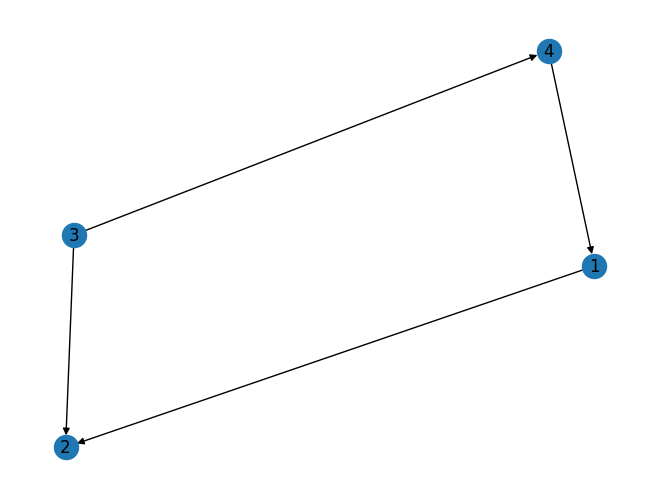

In [17]:
# create an example graph
G1 = nx.DiGraph()
G1.add_edges_from([(1, 2), (3,2), (3, 4), (4, 1)])

# draw the graph
nx.draw(G1, with_labels=True)

## Adjacency matrix
For a simple graph with vertex set $U = {u1, …, un}$, the adjacency matrix is a square n × n matrix A such that its element $A_{ij}$ is one when there is an edge between vertex $u_i$ to vertex $u_j$, and zero when there is no edge.




In [3]:
A = nx.adjacency_matrix(G1).todense()
print(A)

[[0 1 0 0]
 [0 0 0 0]
 [0 1 0 1]
 [1 0 0 0]]


### Powers of adjacency matrix
If $A$ is the adjacency matrix of the directed or undirected graph $G$, then the matrix $A^n$ (i.e., the matrix product of n copies of A) has an interesting interpretation: the element $(i, j)$ gives the number of (directed or undirected) walks of length $n$ from vertex $i$ to vertex $j$.

In [4]:
# 2 step reachability
A_2 = np.linalg.matrix_power(A, 2)
print(f"A_2:\n{A_2}")

A_3 = np.linalg.matrix_power(A, 3)
print(f"A_3:\n{A_3}")

A_4 = np.linalg.matrix_power(A, 4)
print(f"A_4:\n{A_4}")


A_2:
[[0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]]
A_3:
[[0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
A_4:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


### Connectedness of a graph
**Connected Graphs:** A graph is called connected if for any two different nodes i and j there is a directed path
either from i to j or from j to i.  
**Strongly Connected Graphs:**  A graph is called strongly connected if starting at any node i we can reach any other different node j by walking on its edges.   

Matrix interpretation:  
In terms of matrices, this means that if there is a finite positive integer k such that the matrix B = $I + A + A^2 + A^3 + … +A^k$ is positive(all values greater than zero), then the graph is strongly connected.


# Transition matrix
The transition matrix $T$ associated to a directed graph is defined as follows. If there is an edge from $i$ to $j$ and the outdegree of vertex $i$ is $d_i$, then on column i and row j we put $\frac{1}{d_i}$. Otherwise we mark column i, row j with zero.

$$
t_{i,j} = 
    \begin{cases}
        \frac{1}{d_i} \text{ if there is an outgoing edge from i to j}\\
        0 \text{ otherwise}
    \end{cases}
$$

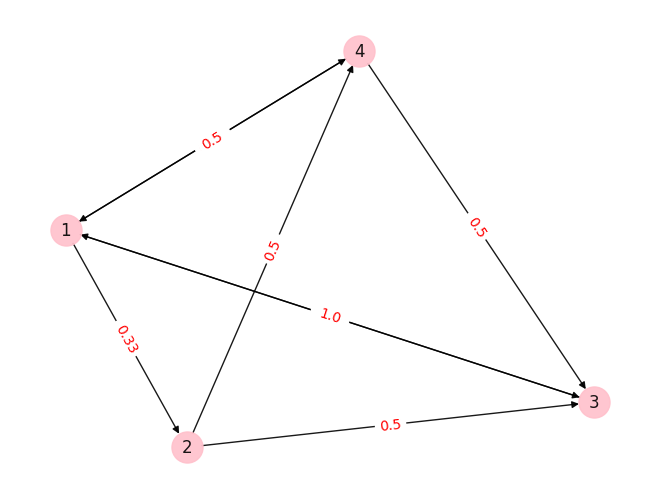

Transition matrix:
[[0.         0.         1.         0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.5        0.         0.5       ]
 [0.33333333 0.5        0.         0.        ]]


In [18]:
# transition matrix
def get_transition_matrix(G):
    n = len(G.nodes())
    transition_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if (i+1, j+1) in G.edges():
                transition_matrix[j, i] = 1 / G.out_degree(i+1)
    return transition_matrix


def draw_graph_with_transistion_probs(G):
    edge_labels = {edge: round(1/G.out_degree(edge[0]),2) for edge in G.edges()}
    
    # draw the graph
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(
        G, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in G.nodes()}
    )
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()
    



G2 = nx.DiGraph()
G2.add_edges_from(
    [
        (1,2),
        (1,4),
        (1,3),
        (2,3),
        (2,4),
        (3,1),
        (4,3),
        (4,1)
        
    ]
)

draw_graph_with_transistion_probs(G2)


G2_T = get_transition_matrix(G2)


print(f"Transition matrix:\n{G2_T}")


### Properties of transition matrix
**Markov property:** A stochastic process has the Markov property if the conditional probability distribution of future states of the process (conditional on both past and present values) depends only upon the present state; that is, given the present, the future does not depend on the past.  

In a **primitive matrix**, every state in the Markov chain can be reached from any other state with positive probability in a finite number of steps.  

Matrix interpretation:  
In general, a matrix is called primitive if there is a positive integer $k$ such that $A^k$ is a positive
matrix.

**A column-stochastic matrix** is a square matrix where each column sums to 1. In other words, it is a matrix representing transition probabilities of a Markov chain where the probabilities of transitioning from one state to all other states sum up to 1 for each state.  
*If a graph is strongly connected then it"s transition matrix is column-stochastic.*

  


In [19]:
def is_primitive(trans_matrix):
    T_n = trans_matrix
    for i in range(1, 1000):
        T_n = np.dot(trans_matrix, T_n)
        if np.all(T_n > 0):
            print(f"Graph is primitive as A^{i} is positive")
            print(T_n)
            return True
    return False
is_primitive(G2_T)

Graph is primitive as A^3 is positive
[[0.33333333 0.375      0.41666667 0.45833333]
 [0.13888889 0.08333333 0.16666667 0.08333333]
 [0.30555556 0.33333333 0.25       0.29166667]
 [0.22222222 0.20833333 0.16666667 0.16666667]]


True

### Stationary distribution
The stationary distribution, also known as the steady-state distribution or equilibrium distribution, of a Markov chain is a probability distribution over the states of the chain that remains unchanged over time. In other words, *it represents the long-term behavior of the Markov chain as it evolves through its states*.

If the transition matrix is:  
1. primitive and
2. column-stochastic

then it has a
unique stationary probability distribution vector $p$ such that $i^{th}$ entry of p is that the surfer visits page i at any given time with probability $p_i$

## How to find stationary distribution?

In [7]:
G2_T

array([[0.        , 0.        , 1.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

#### Dynamical systems point of view(Power Method)

Suppose that all nodes start with equal importance(1/n) represented by vector $v$ and at each step recieve importance from all the incoming nodes. This operation is denoted by: $$Step 0: v$$ $$Step 1: T.v$$ $$Step 3: T^2.v $$ $$...$$ $$Step k: T^k.v$$ where T is the transition matrix and k is the step where the value converges.  


In [20]:
def power_method(P, tol=1e-2, max_iter=10000):
    P = np.around(P, 2)
    n = len(P)
    pi = np.ones((n,1)) / n  # Initial guess for stationary distribution
    print(f"P.shape: {P.shape}")
    print(f"pi.shape: {pi.shape}")
    for _ in range(max_iter):
        pi_next = np.dot(P,pi)
        pi_next = np.around(pi_next, 2)
        if np.linalg.norm(pi_next - pi) < tol:
            return pi_next
        if _%1==0:
            print(f"@iteration{_}: diff={np.linalg.norm(pi_next - pi)}, \npi:\n{pi}")
            print(f"*"*10)
        pi = pi_next

    raise ValueError("Power method did not converge.")

# Example usage
stationary_distribution = power_method(G2_T)
print(f"Stationary Distribution (Power Method):\n{stationary_distribution}")


P.shape: (4, 4)
pi.shape: (4, 1)
@iteration0: diff=0.23194827009486405, 
pi:
[[0.25]
 [0.25]
 [0.25]
 [0.25]]
**********
@iteration1: diff=0.1063014581273465, 
pi:
[[0.38]
 [0.08]
 [0.33]
 [0.21]]
**********
@iteration2: diff=0.09643650760992954, 
pi:
[[0.44]
 [0.13]
 [0.27]
 [0.17]]
**********
@iteration3: diff=0.053851648071345064, 
pi:
[[0.36]
 [0.15]
 [0.3 ]
 [0.21]]
**********
@iteration4: diff=0.014142135623730963, 
pi:
[[0.4 ]
 [0.12]
 [0.3 ]
 [0.19]]
**********
@iteration5: diff=0.022360679774997918, 
pi:
[[0.4 ]
 [0.13]
 [0.29]
 [0.19]]
**********
@iteration6: diff=0.014142135623730963, 
pi:
[[0.38]
 [0.13]
 [0.29]
 [0.2 ]]
**********
@iteration7: diff=0.010000000000000009, 
pi:
[[0.39]
 [0.13]
 [0.29]
 [0.19]]
**********
Stationary Distribution (Power Method):
[[0.38]
 [0.13]
 [0.29]
 [0.19]]


### Linear Algebraic Method
This method involves solving a linear system of equations: $$\pi{P} = \pi$$

In [21]:
def calculate_stationary_probability_via_eigen_vectors(transition_matrix):
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
    
    # Find the index of the eigenvalue closest to 1
    index = np.argmin(np.abs(eigenvalues - 1))
    # Extract the eigenvector corresponding to the eigenvalue 1
    stationary_vector = np.real(eigenvectors[:, index])
    
    # Normalize the stationary vector
    stationary_vector /= np.sum(stationary_vector)
    
    return stationary_vector

stationary_probability = calculate_stationary_probability_via_eigen_vectors(G2_T)
print("Stationary probability vector:", stationary_probability)

Stationary probability vector: [0.38709677 0.12903226 0.29032258 0.19354839]


# Webgraph
Webgraph is a directed graph in which web pages are represented as vertices and the
links between them are represented as edges.

## Problems with WebGraph
**Dangling nodes**: Nodes that have no outgoing edges(also known as sinks). Such nodes are not able to transfer their importance value to any other node.  
**Disconnected components**:  
Since Web is huge and heterogenous in nature, it"s common to have disconnected components in graph. 

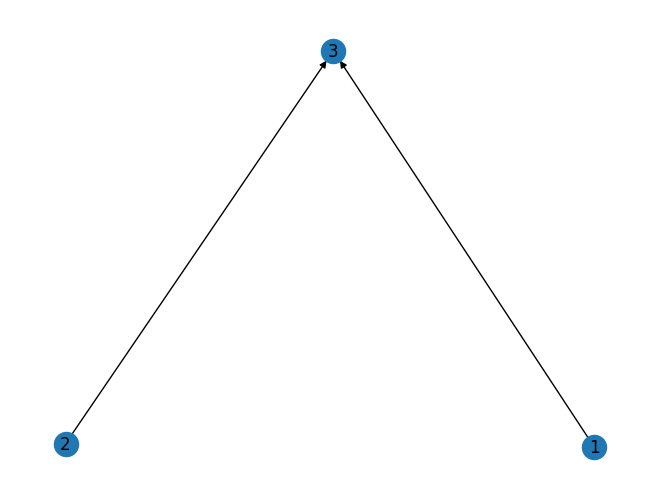

In [10]:
# dangling nodes
G_dangling = nx.DiGraph()
G_dangling.add_edges_from(((1,3),(2,3)))
nx.draw(G_dangling,with_labels=True)


In [11]:
# get transition matrix from graph
transition_matrix = get_transition_matrix(G_dangling)
print(transition_matrix)


stationary_prob = power_method(transition_matrix)
print(stationary_prob)

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 0.]]
P.shape: (3, 3)
pi.shape: (3, 1)
@iteration0: diff=0.5792811637423287, 
pi:
[[0.33333333]
 [0.33333333]
 [0.33333333]]
**********
@iteration1: diff=0.67, 
pi:
[[0.  ]
 [0.  ]
 [0.67]]
**********
[[0.]
 [0.]
 [0.]]


[[0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.5 0.5 0. ]]
[0.         0.         0.33333333 0.33333333 0.33333333]


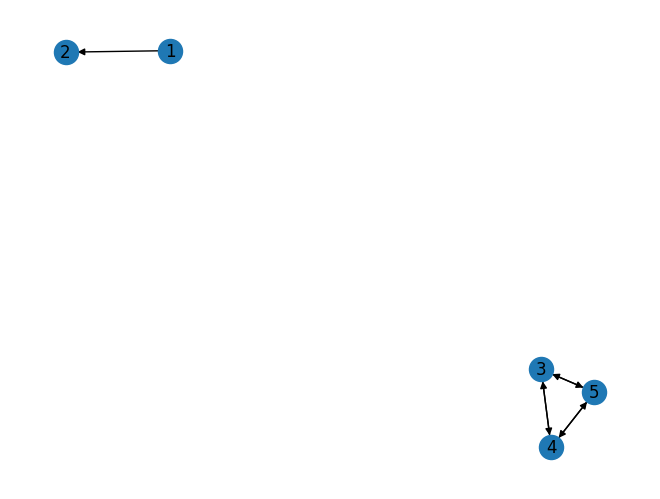

In [22]:
G_disconnected = nx.DiGraph()
G_disconnected.add_edges_from(
    [
        (1,2),
        (3,4),(4,3),
        (4,5),(5,4),
        (3,5), (5,3)
    ]
)
nx.draw(G_disconnected, with_labels=True)
transition_matrix = get_transition_matrix(G_disconnected)
print(transition_matrix)
stationary_distribution = calculate_stationary_probability_via_eigen_vectors(transition_matrix)
print(stationary_distribution)

## Solution: Google matrix
1. To solve the problem of dangling nodes, each dangling node is connected with all the other nodes with equal probabilty($1/n$). Modified transition matrix now looks like:
   $$
t'_{i,j} = 
    \begin{cases}
        \frac{1}{d_i} \text{ if there is an outgoing edge from i to j}\\
        \frac{1}{n} \text{ otherwise}
    \end{cases}
$$
3. To solve disconnected components issue, we add another matrix(random jump matrix) to modified transition matrix(T').
   $$
   T'' = \alpha{T'} + (1- \alpha){E}
   $$
where   
$\alpha$ is the is a damping factor ie. the probability, at any step, that the person will continue following links.  
1-$\alpha$ denotes the probability that surfer will make a random jump. 
   

   This matrix is by defination stochastic(column propabilities adds up to one) and primitive(every node is reachable from other node)

In [13]:
def get_google_matrix(G, alpha=0.85):
    n = len(G.nodes())
    transition_matrix = get_transition_matrix(G)
    print(f"transition_matrix:\n{transition_matrix}")
    # handle dangling nodes
    dangling_nodes = np.where(transition_matrix.sum(axis=0) == 0)[0]
    modified_transition_matrix = transition_matrix.copy()
    modified_transition_matrix[:, dangling_nodes] = 1/n
    print(f"modified_transition_matrix(solves dangling nodes):\n{modified_transition_matrix}")
    # handle disconnected components
    E = np.ones((n, n)) / n
    google_matrix = alpha * modified_transition_matrix + (1 - alpha) * E 
    return google_matrix


google_matrix = get_google_matrix(G_disconnected)
print(f"google_matrix:\n{google_matrix}")

transition_matrix:
[[0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.5 0.5 0. ]]
modified_transition_matrix(solves dangling nodes):
[[0.  0.2 0.  0.  0. ]
 [1.  0.2 0.  0.  0. ]
 [0.  0.2 0.  0.5 0.5]
 [0.  0.2 0.5 0.  0.5]
 [0.  0.2 0.5 0.5 0. ]]
google_matrix:
[[0.03  0.2   0.03  0.03  0.03 ]
 [0.88  0.2   0.03  0.03  0.03 ]
 [0.03  0.2   0.03  0.455 0.455]
 [0.03  0.2   0.455 0.03  0.455]
 [0.03  0.2   0.455 0.455 0.03 ]]


pagerank: {1: 0.04376425171891564, 2: 0.08096440572344879, 3: 0.29175711418587863, 4: 0.29175711418587863, 5: 0.29175711418587863}


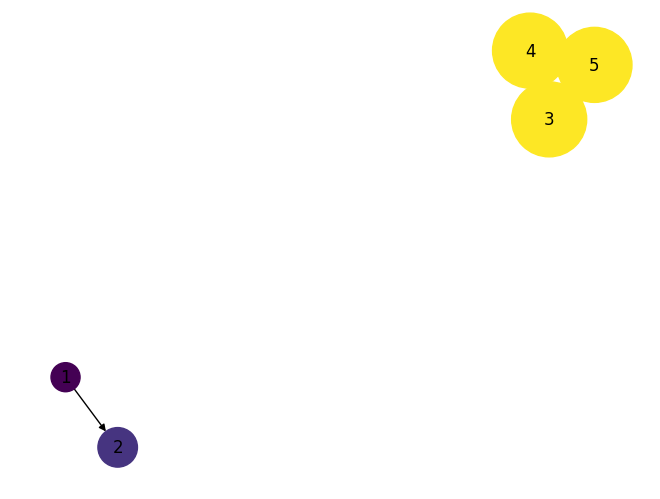

In [23]:
# can be directly calculated for any graph
nx.google_matrix(G_disconnected)

nx.pagerank(G_disconnected)



# Draw the graph with pagerank values
pagerank = nx.pagerank(G_disconnected)
print(f"pagerank: {pagerank}")
nx.draw(
    G_disconnected, with_labels=True,
    node_size=[v * 10000 for v in pagerank.values()],
    node_color=list(pagerank.values())
)

# References
1. [Adjacency matrix - wiki](https://en.wikipedia.org/wiki/Adjacency_matrix)
2. [Pagerank - wiki](https://en.wikipedia.org/wiki/PageRank)
3. [pagerank - networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)